In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Social media profiles
social_df = pd.read_csv('data/customer_social_profiles.csv')

# Transactions
trans_df = pd.read_csv('data/customer_transactions.csv')

# Convert customer_id in transactions to match social profile (add "A" prefix and pad with zeros if needed)
trans_df['customer_id_new'] = 'A' + trans_df['customer_id_legacy'].astype(str)

In [15]:
merged_df = pd.merge(social_df, trans_df, on='customer_id_new', how='inner')

# Check merge success
print("Merged shape:", merged_df.shape)
print("Sample merged data:\n", merged_df.head())

Merged shape: (219, 11)
Sample merged data:
   customer_id_new social_media_platform  engagement_score  \
0            A190               Twitter                82   
1            A190               Twitter                82   
2            A150              Facebook                96   
3            A150              Facebook                96   
4            A162               Twitter                89   

   purchase_interest_score review_sentiment  customer_id_legacy  \
0                      4.8          Neutral                 190   
1                      4.8          Neutral                 190   
2                      1.6         Positive                 150   
3                      1.6         Positive                 150   
4                      2.6         Positive                 162   

   transaction_id  purchase_amount purchase_date product_category  \
0            1031              333    2024-01-31        Groceries   
1            1140              401    2024-05-1

In [16]:
# Check for missing values
print("Nulls:\n", merged_df.isnull().sum())

# Check for duplicates
print("Duplicates:", merged_df.duplicated().sum())

# Convert data types if necessary
merged_df['purchase_date'] = pd.to_datetime(merged_df['purchase_date'])

# Drop unused legacy ID
merged_df.drop(columns=['customer_id_legacy'], inplace=True)

Nulls:
 customer_id_new             0
social_media_platform       0
engagement_score            0
purchase_interest_score     0
review_sentiment            0
customer_id_legacy          0
transaction_id              0
purchase_amount             0
purchase_date               0
product_category            0
customer_rating            19
dtype: int64
Duplicates: 6


In [17]:
# Fill missing customer_rating
merged_df['customer_rating'].fillna(merged_df['customer_rating'].median(), inplace=True)

/tmp/ipython-input-17-2662877689.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['customer_rating'].fillna(merged_df['customer_rating'].median(), inplace=True)


       customer_id_new social_media_platform  engagement_score  \
count              219                   219        219.000000   
unique              61                     5               NaN   
top               A187               Twitter               NaN   
freq                15                    61               NaN   
mean               NaN                   NaN         75.283105   
min                NaN                   NaN         50.000000   
25%                NaN                   NaN         63.000000   
50%                NaN                   NaN         77.000000   
75%                NaN                   NaN         89.000000   
max                NaN                   NaN         99.000000   
std                NaN                   NaN         15.082715   

        purchase_interest_score review_sentiment  transaction_id  \
count                219.000000              219      219.000000   
unique                      NaN                3             NaN   
top

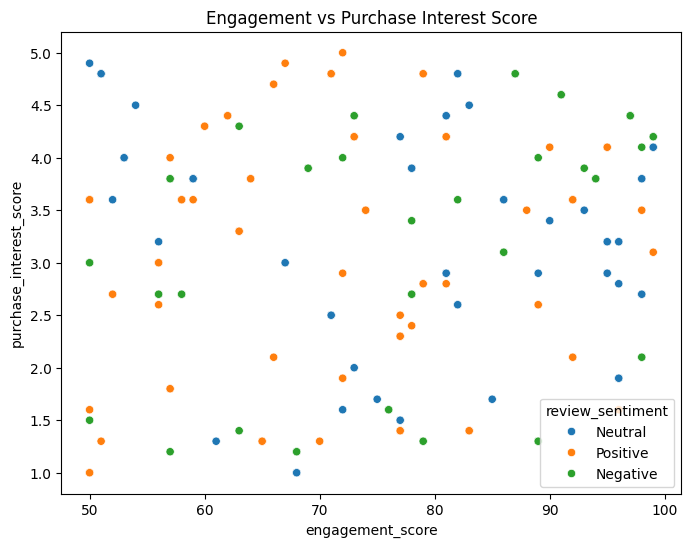

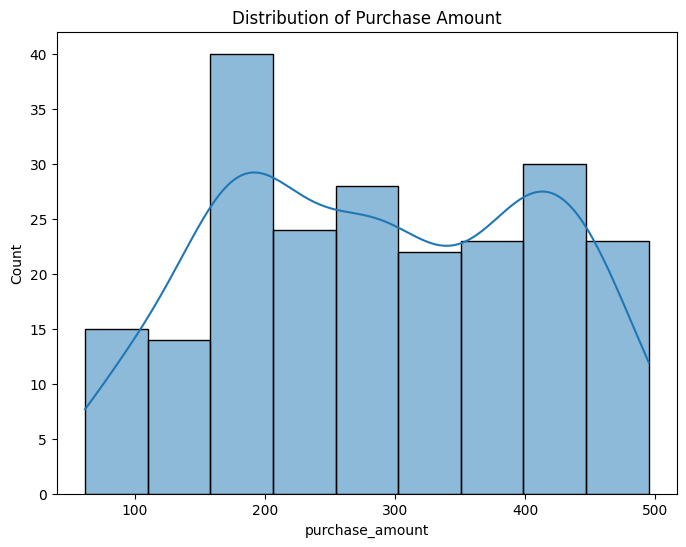

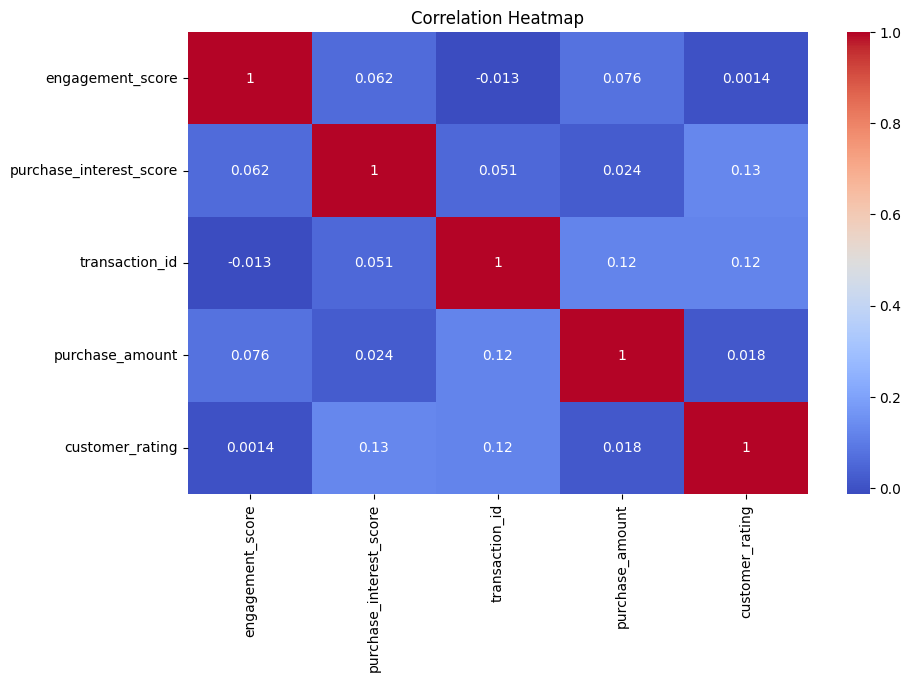

In [18]:
# Summary statistics
print(merged_df.describe(include='all'))

# Variable Types
print(merged_df.dtypes)

# Plot 1: Engagement vs Purchase Interest
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='engagement_score', y='purchase_interest_score', hue='review_sentiment')
plt.title("Engagement vs Purchase Interest Score")
plt.show()

# Plot 2: Distribution of Purchase Amount
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['purchase_amount'], kde=True)
plt.title("Distribution of Purchase Amount")
plt.show()

# Plot 3: Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [19]:
# Check unique customers
print("Unique customers in merged set:", merged_df['customer_id_new'].nunique())

# Check product categories
print("Product categories:", merged_df['product_category'].value_counts())


Unique customers in merged set: 61
Product categories: product_category
Sports         60
Electronics    46
Books          41
Groceries      39
Clothing       33
Name: count, dtype: int64


In [20]:
# Save the final merged and cleaned dataframe
merged_df.to_csv("data/merged_customer_data.csv", index=False)

print("Clean, merged dataset saved to 'merged_customer_data.csv'.")

Clean, merged dataset saved to 'merged_customer_data.csv'.
